In [91]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, utils
from IPython.display import Image
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [92]:
# 0. 데이터를 준비 : 학습용, 테스트용  --> 지도학습 (데이터 들, 레이블)
# 데이터 섞어주기
df = pd.read_csv('ETL_DATA/OsanDataset.csv')  # CSV --> DataFrame
df = utils.shuffle(df)

In [93]:
#문제 데이터프레임 컬럼 뽑아내기
x = np.array(pd.DataFrame(df, columns=['youth','baby','build','youchiwon','elementry','gym','academy','school_zone','cctv','cross','parking','speedBump','trafficLight']))
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
#답 데이터프레임 컬럼 뽑아내기
y = np.array(pd.DataFrame(df, columns=['acc_sum']))
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [96]:
#머신러닝모델로 의사결정트리를 선택함
dt_clf = DecisionTreeClassifier()

In [97]:
# 모델 학습시키기
dt_clf = dt_clf.fit(x_train, y_train)
dt_prediction = dt_clf.predict(x_test)

In [98]:
from sklearn import utils, metrics

#결정된 모델로 예측해보기
answers = dt_clf.predict(x_test)
score = metrics.accuracy_score(answers, y_test) * 100
print('정답률 : %5.2f %%' % (score))

정답률 : 87.50 %


  0%|          | 0/19 [00:00<?, ?it/s]

depth = 1 done.
depth = 2 done.
depth = 3 done.
depth = 4 done.
depth = 5 done.
depth = 6 done.
depth = 7 done.
depth = 8 done.
depth = 9 done.
depth = 10 done.
depth = 11 done.
depth = 12 done.
depth = 13 done.
depth = 14 done.
depth = 15 done.
depth = 16 done.
depth = 17 done.
depth = 18 done.
depth = 19 done.
시험 데이터의 정확도 = 0.9193
최적 트리의 depth = 3


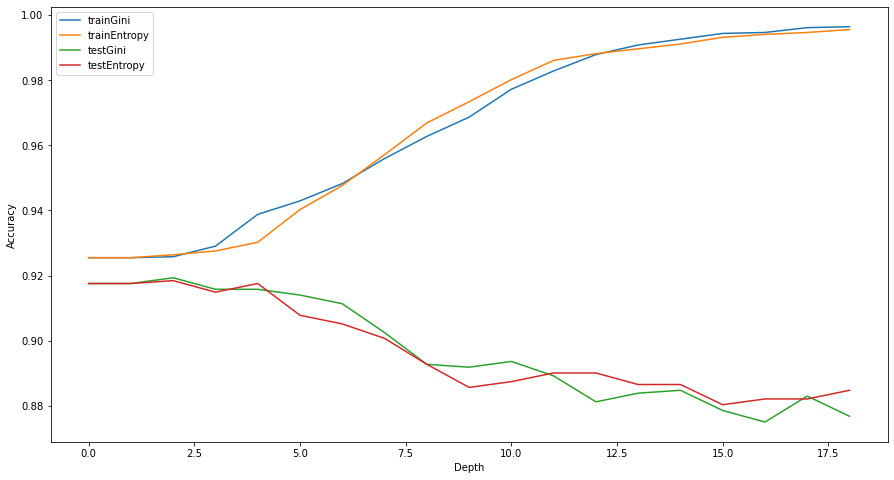

In [101]:
trainGini = []
testGini = []
trainEntropy = []
testEntropy = []
depth = []

# 사전 가지치기
for k in tqdm_notebook(range(1, 20)):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
    dt.fit(x_train, y_train)
    
    trainGini.append(dt.score(x_train, y_train))
    testGini.append(dt.score(x_test, y_test))
    
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
    dt.fit(x_train, y_train)
    
    trainEntropy.append(dt.score(x_train, y_train))
    testEntropy.append(dt.score(x_test, y_test))
    
    depth.append(k)
    print('depth = %d done.' % k)

plt.figure(figsize=(15, 8))
plt.plot(trainGini, label='trainGini')
plt.plot(trainEntropy, label='trainEntropy')
plt.plot(testGini, label='testGini')
plt.plot(testEntropy, label='testEntropy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
# plt.show()

# 정확도가 가장 큰 최적의 depth를 찾는다
nDepth = depth[np.argmax(testGini)]

# opt_alpha를 적용한 tree를 사용한다
dt = DecisionTreeClassifier(max_depth = nDepth)
dt.fit(x_train, y_train)
print('시험 데이터의 정확도 = %.4f' % dt.score(x_test, y_test))
print('최적 트리의 depth = %d' % nDepth)